Original Image 1 shape: (462, 404, 3)
Original Image 2 shape: (462, 259, 3)
Original Image 3 shape: (462, 317, 3)
Resized Image 1 shape: (465, 465, 3)
Resized Image 2 shape: (465, 465, 3)
Resized Image 3 shape: (465, 465, 3)


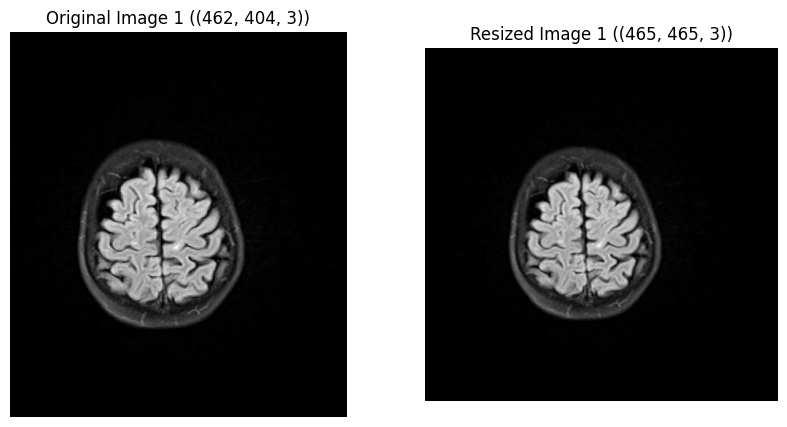

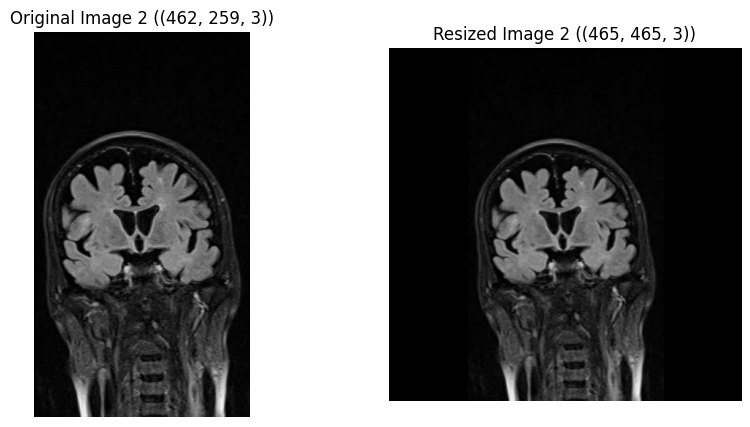

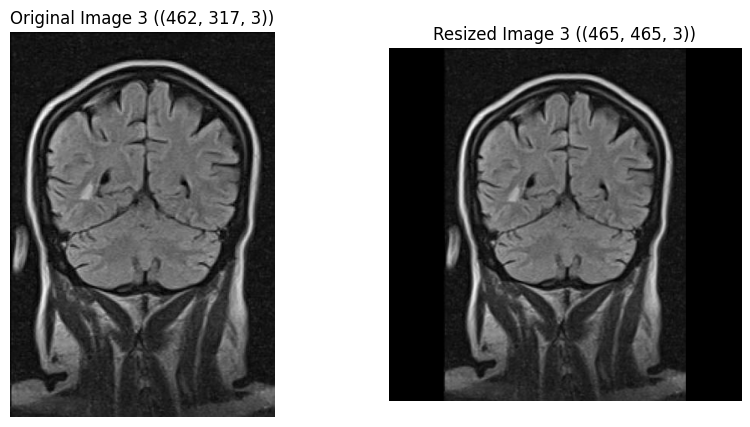

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Function to preprocess image
def preprocess_image(image, img_height, img_width):
    resized_image = tf.image.resize_with_pad(image, img_height, img_width)  # Resize with padding
    
    # Convert to grayscale first if the image is not already grayscale
    if image.shape[-1] == 1:  # Only applies if it is grayscale (H, W, 1)
        resized_image = tf.image.grayscale_to_rgb(resized_image)
    
    return resized_image

# Function to load an image from a file and normalize it
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)  # Load as RGB to ensure proper shape
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize to [0,1] range
    return image

# Paths to two images (replace with actual file paths)
image_path1 = "C:/Users/samik/Downloads/NewOriginalSlices-20250318T213744Z-001/NewOriginalSlices/1/pat3_slice_16.jpg"
image_path2 = "C:/Users/samik/Downloads/NewOriginalSlices-20250318T213744Z-001/NewOriginalSlices/1/pat54_slice_10.jpg"
image_path3 = "C:/Users/samik/Downloads/NewOriginalSlices-20250318T213744Z-001/NewOriginalSlices/1/pat53_slice_15.jpg"


# Load images
image1 = load_image(image_path1)
image2 = load_image(image_path2)
image3 = load_image(image_path3)


# Print original dimensions
print(f"Original Image 1 shape: {image1.shape}")
print(f"Original Image 2 shape: {image2.shape}")
print(f"Original Image 3 shape: {image3.shape}")


# Define target size
img_height, img_width = 465, 465  # Adjust as needed

# Resize images with padding
resized_image1 = preprocess_image(image1, img_height, img_width)
resized_image2 = preprocess_image(image2, img_height, img_width)
resized_image3 = preprocess_image(image3, img_height, img_width)


# Print resized dimensions
print(f"Resized Image 1 shape: {resized_image1.shape}")
print(f"Resized Image 2 shape: {resized_image2.shape}")
print(f"Resized Image 3 shape: {resized_image3.shape}")


# Function to display images
def plot_comparison(original, resized, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original)
    axes[0].set_title(f"Original {title} ({original.shape})")
    axes[0].axis("off")

    axes[1].imshow(resized)
    axes[1].set_title(f"Resized {title} ({resized.shape})")
    axes[1].axis("off")

    plt.show()

# Show comparisons
plot_comparison(image1, resized_image1, "Image 1")
plot_comparison(image2, resized_image2, "Image 2")
plot_comparison(image3, resized_image3, "Image 3")



Original Image 1 shape: (462, 404, 3)
Original Image 2 shape: (462, 259, 3)
Original Image 2 shape: (462, 317, 3)
Padded Image 1 shape: (465, 465, 3)
Padded Image 2 shape: (465, 465, 3)
Padded Image 3 shape: (465, 465, 3)


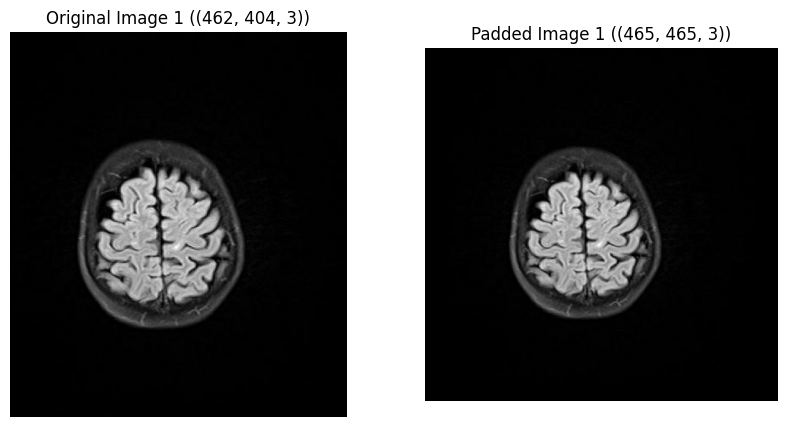

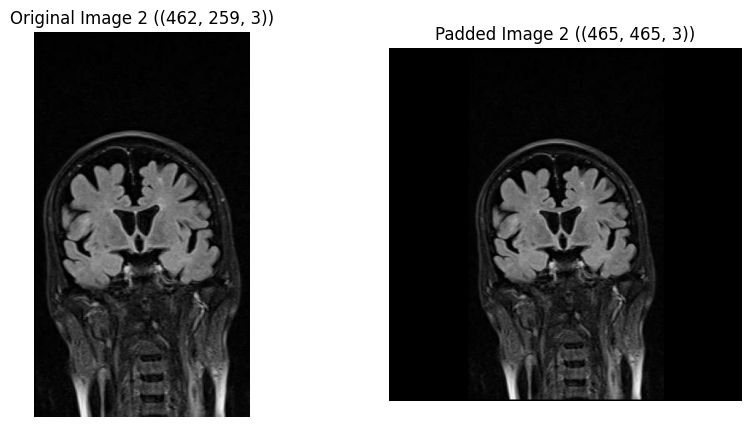

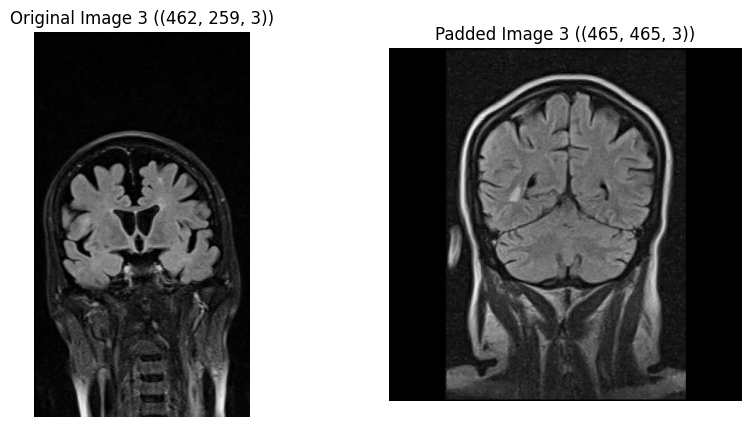

In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to load an image from file
def load_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_image(image, channels=3)  # Load as RGB
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize to [0,1] range
    return image

# Function to apply zero padding
def zero_pad_image(image, target_height, target_width):
    """Pads an image with zeros to match the target size while keeping the object centered."""
    img_height, img_width = image.shape[:2]

    # Calculate padding for height and width
    pad_top = (target_height - img_height) // 2
    pad_bottom = target_height - img_height - pad_top
    pad_left = (target_width - img_width) // 2
    pad_right = target_width - img_width - pad_left

    # Apply zero padding
    padded_image = tf.pad(
        image, [[pad_top, pad_bottom], [pad_left, pad_right], [0, 0]], mode="CONSTANT", constant_values=0
    )

    return padded_image

# Paths to two images (replace with actual file paths)
image_path1 = "C:/Users/samik/Downloads/NewOriginalSlices-20250318T213744Z-001/NewOriginalSlices/1/pat3_slice_16.jpg"
image_path2 = "C:/Users/samik/Downloads/NewOriginalSlices-20250318T213744Z-001/NewOriginalSlices/1/pat54_slice_10.jpg"
image_path3 = "C:/Users/samik/Downloads/NewOriginalSlices-20250318T213744Z-001/NewOriginalSlices/1/pat53_slice_15.jpg"


# Load images
image1 = load_image(image_path1)
image2 = load_image(image_path2)
image3 = load_image(image_path3)


# Print original dimensions
print(f"Original Image 1 shape: {image1.shape}")
print(f"Original Image 2 shape: {image2.shape}")
print(f"Original Image 2 shape: {image3.shape}")


# Define target size (e.g., 465x465)
target_height, target_width = 465, 465

# Apply zero padding
padded_image1 = zero_pad_image(image1, target_height, target_width)
padded_image2 = zero_pad_image(image2, target_height, target_width)
padded_image3 = zero_pad_image(image3, target_height, target_width)


# Print new dimensions
print(f"Padded Image 1 shape: {padded_image1.shape}")
print(f"Padded Image 2 shape: {padded_image2.shape}")
print(f"Padded Image 3 shape: {padded_image3.shape}")


# Function to display images
def plot_comparison(original, padded, title):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(original)
    axes[0].set_title(f"Original {title} ({original.shape})")
    axes[0].axis("off")

    axes[1].imshow(padded)
    axes[1].set_title(f"Padded {title} ({padded.shape})")
    axes[1].axis("off")

    plt.show()

# Show comparisons
plot_comparison(image1, padded_image1, "Image 1")
plot_comparison(image2, padded_image2, "Image 2")
plot_comparison(image2, padded_image3, "Image 3")

